# Importing Libraries and Notebook configration

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(rc = {'figure.figsize':(16,8)})
pd.set_option('display.float_format', lambda x : '%2f' % x)
warnings.filterwarnings('ignore')

# Data cleaning and Data formatting

In [2]:
df_feb = pd.read_csv('test1.csv')

In [3]:
df_feb.head()

,ymd,locale,group,visits,clicks,revenue,bookings,booking_amount
0,2019-02-01,US,test,19219.000000,17289.000000,23752.189583,1072.000000,215244.300977
1,2019-02-01,US,control,204923.000000,184276.000000,250169.068436,11775.000000,2176644.088285
2,2019-02-01,DE,test,14788.000000,13273.000000,10381.106892,492.000000,92056.389656
3,2019-02-01,DE,control,106112.000000,95555.000000,72563.524075,3621.000000,771990.890331
4,2019-02-01,UK,test,13823.000000,12441.000000,10472.761095,486.000000,100340.507503


In [4]:
df_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 8 columns):
ymd               403 non-null object
locale            404 non-null object
group             405 non-null object
visits            399 non-null float64
clicks            399 non-null float64
revenue           400 non-null float64
bookings          400 non-null float64
booking_amount    401 non-null float64
dtypes: float64(5), object(3)
memory usage: 25.7+ KB


In [5]:
df_may = pd.read_csv('test2.csv')

In [6]:
df_may.head()

,ymd,locale,group,visits,clicks,revenue,bookings,booking_amount
0,2019-05-01,US,test,18978.000000,16560.000000,22868.156215,1400.000000,307988.783656
1,2019-05-01,US,control,188086.000000,169373.000000,208131.939979,13558.000000,2780706.272389
2,2019-05-01,DE,test,8441.000000,7358.000000,5214.547510,348.000000,66838.719101
3,2019-05-01,DE,control,90793.000000,81661.000000,55249.407028,3185.000000,624351.255921
4,2019-05-01,UK,test,10907.000000,9557.000000,8853.686349,403.000000,88205.813222


In [7]:
df_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 8 columns):
ymd               443 non-null object
locale            442 non-null object
group             447 non-null object
visits            447 non-null float64
clicks            445 non-null float64
revenue           447 non-null float64
bookings          448 non-null float64
booking_amount    445 non-null float64
dtypes: float64(5), object(3)
memory usage: 28.5+ KB


In [8]:
#Appending both CSV files into a single dataframe for exploration

df = df_feb.append(df_may)

In [9]:
df.head() #overview of the dataset

,ymd,locale,group,visits,clicks,revenue,bookings,booking_amount
0,2019-02-01,US,test,19219.000000,17289.000000,23752.189583,1072.000000,215244.300977
1,2019-02-01,US,control,204923.000000,184276.000000,250169.068436,11775.000000,2176644.088285
2,2019-02-01,DE,test,14788.000000,13273.000000,10381.106892,492.000000,92056.389656
3,2019-02-01,DE,control,106112.000000,95555.000000,72563.524075,3621.000000,771990.890331
4,2019-02-01,UK,test,13823.000000,12441.000000,10472.761095,486.000000,100340.507503


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 453
Data columns (total 8 columns):
ymd               846 non-null object
locale            846 non-null object
group             852 non-null object
visits            846 non-null float64
clicks            844 non-null float64
revenue           847 non-null float64
bookings          848 non-null float64
booking_amount    846 non-null float64
dtypes: float64(5), object(3)
memory usage: 60.8+ KB


**Checking missing values per attribute**

In [11]:
print('Total Rows')
print(df.isnull().shape[0])
print('-------------------------------')
print('Missing values per attribute:')
print(df.isnull().sum())
print('-------------------------------')
print(round((df.dropna().shape[0]/df.shape[0]),2),'% of the rows have a missing value.')

Total Rows
864
-------------------------------
Missing values per attribute:
ymd               18
locale            18
group             12
visits            18
clicks            20
revenue           17
bookings          16
booking_amount    18
dtype: int64
-------------------------------
0.89 % of the rows have a missing value.


**Visualizing the missing data**

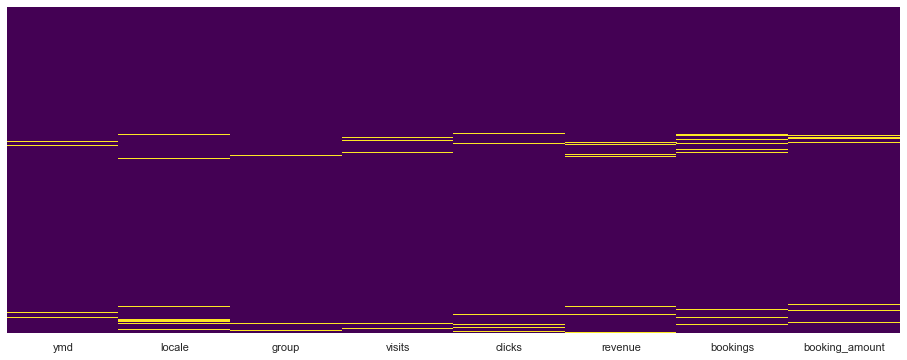

In [12]:
sns.set(rc = {'figure.figsize':(16,6)})
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

**Dealing with missing values**: based on the above insights, I decided to disregad rows with missing values.

In [13]:
# dropping the missing values in the rows
df_clean = df.dropna()

In [14]:
# verifying if there are any missing values left
print('Total Rows')
print(df_clean.isnull().shape[0])
print('-------------------------------')
print('Missing values per attribute:')
print(df_clean.isnull().sum())

Total Rows
771
-------------------------------
Missing values per attribute:
ymd               0
locale            0
group             0
visits            0
clicks            0
revenue           0
bookings          0
booking_amount    0
dtype: int64


**Identifying Outliers**

Text(0.5, 1.0, 'Number of Booking amount')

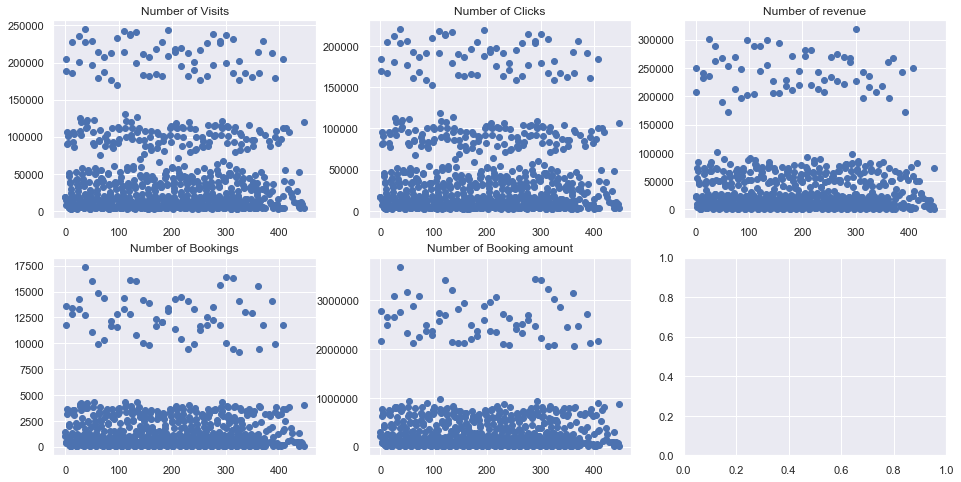

In [15]:
fig,ax = plt.subplots(2, 3, figsize = (16,8))
ax[0,0].scatter(x = df_clean.index, y = df_clean.visits)
ax[0,0].set_title('Number of Visits')

ax[0,1].scatter(x = df_clean.index, y = df_clean.clicks)
ax[0,1].set_title('Number of Clicks')

ax[0,2].scatter(x = df_clean.index, y = df_clean.revenue)
ax[0,2].set_title('Number of revenue')

ax[1,0].scatter(x = df_clean.index, y = df_clean.bookings)
ax[1,0].set_title('Number of Bookings')

ax[1,1].scatter(x = df_clean.index, y = df_clean.booking_amount)
ax[1,1].set_title('Number of Booking amount')

As the data is small and a large number of data points are varying I am not removing any data.

**Comment:**

Dates are still but are not relevant for the A/B test analysis. They will be dealt with when analysing trends in data set. 

# Data Exploration

### What is the most valuable platform for trivago? why?

In [16]:
df_clean[['locale','revenue']].groupby('locale').mean().sort_values(by=['revenue'], ascending = False)

,revenue
locale,
US,129569.003817
UK,40794.171939
DE,35881.852986
AU,25250.850423
JP,12514.329437
BR,8308.581268


In [17]:
df_clean[['locale','bookings', 'clicks']].groupby('locale').mean().sort_values(by=['bookings','clicks'], ascending = False)

,bookings,clicks
locale,,
US,6850.656489,100247.412214
DE,1923.007519,51696.533835
UK,1898.039370,50984.921260
AU,1210.870968,25311.233871
BR,565.883721,19846.503876
JP,309.299213,16139.448819


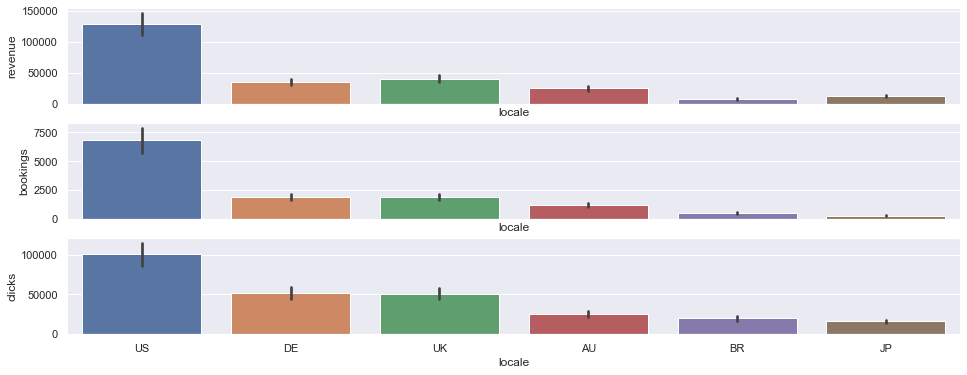

In [18]:
fig, axes = plt.subplots(nrows = 3, sharex = True)
sns.barplot(x = 'locale', y = 'revenue', data = df_clean, ax = axes[0])
sns.barplot(x = 'locale', y = 'bookings', data = df_clean, ax = axes[1])
sns.barplot(x = 'locale' , y = 'clicks', data = df_clean, ax = axes[2])

**US is the most valuable platform based on bookings, no of clicks and its revenue**

###  What is the platform global and platform average revenue per click? 

**Global average revenue per click**

In [19]:
df_clean['revenue_per_click'] =  df_clean['revenue'] / df_clean['clicks'] 
df_clean[['revenue_per_click']].mean()

revenue_per_click   0.827646
dtype: float64

**Platform average revenue per click** 

In [20]:
df_clean[['locale','revenue_per_click']].groupby('locale').mean().sort_values(by=['revenue_per_click'], ascending=False)

,revenue_per_click
locale,
US,1.292800
AU,0.992837
UK,0.800844
JP,0.782020
DE,0.687641
BR,0.412141


### Trend in the data

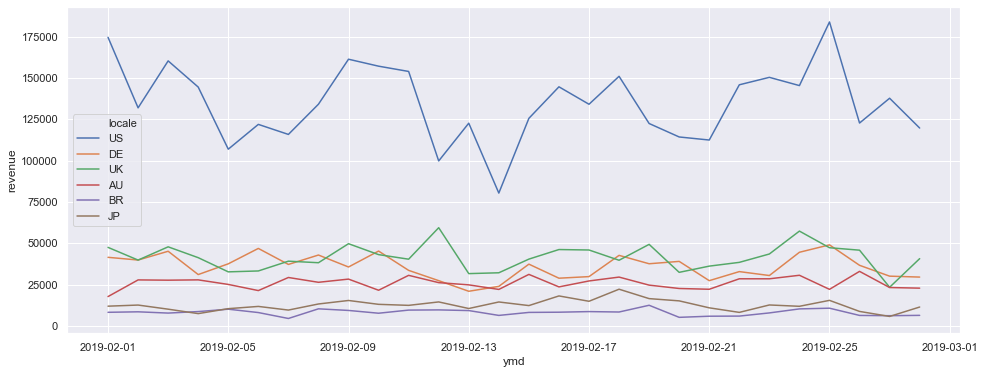

In [21]:
#Transforming ymd to timestamp type
df_ts = df_clean.dropna(subset=['ymd'])
df_ts['ymd'] = pd.to_datetime(df_ts['ymd'])

# Plotting data for first experiment 02-2019
sns.lineplot(x='ymd', 
             y='revenue',
             hue='locale', 
             data=df_ts[df_ts['ymd'] <= '2019-03-01' ],ci=None)

Looking at US, UK and DE lines, it seems that we have some seasonality patterns. Bookings are spiking in the weekends (e.g. 16/02 and 17/02) and decreasing during the week days.

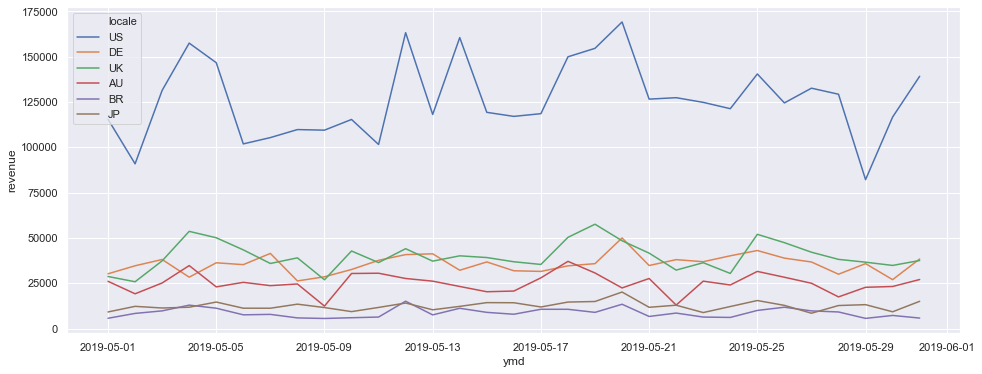

In [22]:
# Plotting data for 2nd experiment 05-2019
sns.lineplot(x='ymd',
             y='revenue',
             hue='locale',
             data=df_ts[df_ts['ymd'] > '2019-03-01' ],ci=None)

Same pattern as above is observed (e.g. week-end of 04-05 and 05-05).

It seems that we had a strong decrease on the 29th. To be investigated further as this has only happened on US market.

###  Which relation do you think exists between clicks and bookings?

In [23]:
# Computing global click to booking conversion rate
df_clean['cr_click_booking'] =  df_clean['clicks'] / df_clean['booking_amount'] 
df_clean[['locale','cr_click_booking']].mean()

cr_click_booking   0.139774
dtype: float64

In [24]:
# Computing locale click to booking conversion rate
df_clean[['locale','cr_click_booking']].groupby('locale').mean().sort_values(by=['cr_click_booking'], ascending=False)

,cr_click_booking
locale,
JP,0.248072
BR,0.166978
UK,0.127452
DE,0.126775
AU,0.100148
US,0.070645


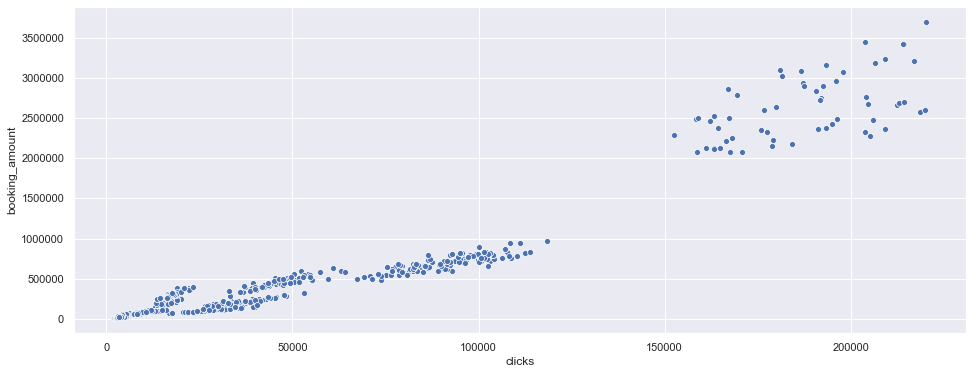

In [25]:
# Plotting clicks vs bookings
sns.scatterplot(x=df_clean['clicks'], y=df_clean['booking_amount'])

We can see in the above scatter plot that there is a positive relationship between clicks and bookings. The more clicks we have, the more bookings.

### And what about visits and bookings? Which one would you consider as more valuable KPI?

In [26]:
# Computing global visit to booking conversion rate

In [27]:
df_clean['cr_visit_booking'] =  df_clean['visits'] / df_clean['booking_amount'] 
df_clean[['locale','cr_visit_booking']].mean()

cr_visit_booking   0.156462
dtype: float64

In [28]:
# Computing locale visit to booking conversion rate

In [29]:
df_clean[['locale','cr_visit_booking']].groupby('locale').mean().sort_values(by=['cr_visit_booking'], ascending=False)

,cr_visit_booking
locale,
JP,0.277672
BR,0.186971
UK,0.142721
DE,0.141892
AU,0.112083
US,0.079034


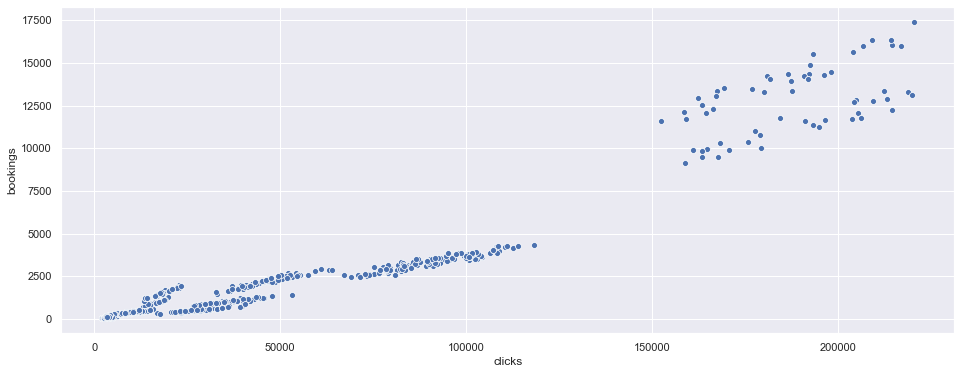

In [30]:
# Plotting clicks vs bookings
sns.scatterplot(x = df_clean['clicks'], y = df_clean['bookings'])

Overall I would focus more on visits to bookings metric as this is giving more insight on the user journey.

This is allowing to consider the conversion from an earlier stage in the user journey (i.e. the visit instead of the click). Hence, this benchmark would give more insight on the platform is doing at converting users.

# A/B test analysis

### Which metrics would you use to evaluate the performance of the test group?


In order to test statistical significance I would use the below metrics:
- conversion rate bookings to visits 
- conversion rate bookings to click 

As a decision metric, I would also take the revenue generated (has to be as high in test as in control)
- Revenue per visit

 ### Can you summarise the performance of the tests?


### Test 1

In [31]:
df_feb = df_feb.dropna()

In [32]:
df_test1 = df_feb[['group', 'visits', 'clicks', 'revenue', 'bookings']].groupby('group').sum()

In [33]:
df_test1['cr_booking_click'] = df_test1['bookings']  / df_test1['clicks'] 
df_test1['cr_booking_visit'] = df_test1['bookings']  / df_test1['visits'] 
df_test1['revenue_per_visit'] = df_test1['revenue']  / df_test1['visits'] 
df_test1

,visits,clicks,revenue,bookings,cr_booking_click,cr_booking_visit,revenue_per_visit
group,,,,,,,
control,16645385.000000,14980772.000000,14410605.839031,675533.000000,0.045093,0.040584,0.865742
test,1781367.000000,1603473.000000,1438725.192498,68225.000000,0.042548,0.038299,0.807652


### Conclusion & recommendation

Conclusion: results in test sample are lower than in control sample. The feature tested in this experiment is probably not creating value for the user. 

Given that the results are not positve, we don't have do do some statistical testing and the **recommendation is to develop the feature further before testing again.**

### Test 2

In [34]:
df_may = df_may.dropna()
df_test2 = df_may[['group', 'visits', 'clicks', 'revenue', 'bookings']].groupby('group').sum()
df_test2['cr_booking_click'] = df_test2['bookings']  / df_test2['clicks'] 
df_test2['cr_booking_visit'] = df_test2['bookings']  / df_test2['visits'] 
df_test2['revenue_per_visit'] = df_test2['revenue']  / df_test2['visits'] 
df_test2

,visits,clicks,revenue,bookings,cr_booking_click,cr_booking_visit,revenue_per_visit
group,,,,,,,
control,17750611.000000,15974761.000000,15248087.100610,816727.000000,0.051126,0.046011,0.859018
test,1915022.000000,1672631.000000,1621499.925766,96190.000000,0.057508,0.050229,0.846727


In [35]:
# CR Booking to Clicks - Chi squared test for statistical significance
from scipy.stats import norm
import numpy as np


mu_B = 0.058
mu_A = 0.051

var_B = mu_B * (1-mu_B)
var_A = mu_A * (1-mu_A)

n_B = 1915022
n_A = 17750611

Z = (mu_B - mu_A)/np.sqrt(var_B/n_B + var_A/n_A)
pvalue = norm.sf(Z)


print('relative increase between control and test:', round(mu_B/mu_A-1, 2), '%')
print("Z-score: {0}\np-value: {1}".format(Z,round(pvalue,2)))

relative increase between control and test: 0.14 %
Z-score: 39.5936526126555
p-value: 0.0


Given that p-value is below 0.01, we have 99% stat. significance  that the tested feature is improving the conversion rate Booking to visits. 

In [36]:
# CR Booking to Visits - Chi squared test for statistical significance
from scipy.stats import norm
import numpy as np


mu_B = 0.050
mu_A = 0.046

var_B = mu_B * (1-mu_B)
var_A = mu_A * (1-mu_A)

n_B = 1915022
n_A = 17750611

Z = (mu_B - mu_A)/np.sqrt(var_B/n_B + var_A/n_A)
pvalue = norm.sf(Z)


print('relative increase between control and test:', round(mu_B/mu_A-1, 2), '%')
print("Z-score: {0}\np-value: {1}".format(Z,round(pvalue,2)))

relative increase between control and test: 0.09 %
Z-score: 24.21968508464527
p-value: 0.0


Given that p-value is below 0.01, we have 99% stat. significance that the tested feature is improving the conversion rate Booking to Click. 

However, it appears that the revenue generated per visit is lower in the test. 

### Conclusion & recommendation

Conclusion: even if the conversion rates are better and statstically significant at 99%, it appears that revenue is lower in test variation. 

Therefore my recommendation would be to **develop the feature further before testing again.**